In [1]:
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
alt.data_transformers.disable_max_rows()



DataTransformerRegistry.enable('default')

In [2]:
# load data
df = pd.read_csv("../../data/raw/world-data-gapminder_raw.csv")

In [3]:
df["education_ratio"] = df.years_in_school_men / df.years_in_school_women

In [4]:
df = df.loc[df['year'] >= 1950]

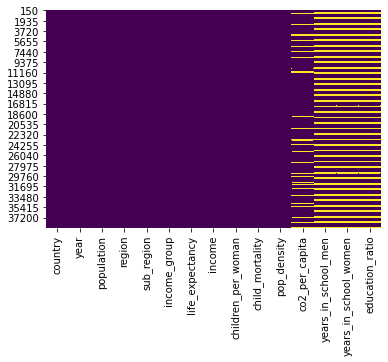

In [5]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False);

In [6]:
# filtered_df = df[df[['education_ratio']].notnull().all(1)]

In [7]:
# sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=False);

In [8]:
df.to_csv("../../data/processed/gapminder_processed.csv")

In [9]:
df

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,education_ratio
150,Afghanistan,1950,7750000,Asia,Southern Asia,Low,32.0,1040,7.57,425.0,11.9,0.0109,NaN,NaN,NaN
151,Afghanistan,1951,7840000,Asia,Southern Asia,Low,32.4,1060,7.56,421.0,12.0,0.0117,NaN,NaN,NaN
152,Afghanistan,1952,7930000,Asia,Southern Asia,Low,33.0,1070,7.55,414.0,12.2,0.0115,NaN,NaN,NaN
153,Afghanistan,1953,8040000,Asia,Southern Asia,Low,33.7,1120,7.54,407.0,12.3,0.0132,NaN,NaN,NaN
154,Afghanistan,1954,8150000,Asia,Southern Asia,Low,34.4,1130,7.53,400.0,12.5,0.0131,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,Zimbabwe,2014,15400000,Africa,Sub-Saharan Africa,Low,57.0,1910,3.90,64.3,39.8,0.7800,10.9,10.0,1.090000
38978,Zimbabwe,2015,15800000,Africa,Sub-Saharan Africa,Low,58.3,1890,3.84,59.9,40.8,NaN,11.1,10.2,1.088235
38979,Zimbabwe,2016,16200000,Africa,Sub-Saharan Africa,Low,59.3,1860,3.76,56.4,41.7,NaN,NaN,NaN,NaN
38980,Zimbabwe,2017,16500000,Africa,Sub-Saharan Africa,Low,59.8,1910,3.68,56.8,42.7,NaN,NaN,NaN,NaN


In [10]:

variable_interest = "education_ratio"

data = df[
    (df["year"] == 2015) & (df["sub_region"] == "Northern Africa") & (df["income_group"] == "High")
]


data

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,education_ratio


In [11]:
df = df.loc[df["year"] == 2000]

# specify variable of interest
variable_interest = "education_ratio"

data = df[
    (df["year"] == 2018)  & (df["income_group"] == "High")
]


dat = data[data[['education_ratio']].notnull().all(1)]

(alt.Chart(dat).mark_bar()
.encode(
    y = alt.Y('country', sort='-x'),
    x=variable_interest,
    color='country')
.transform_window(
    rank='rank(variable_interest)',
    sort=[alt.SortField(variable_interest, order='descending')])
.transform_filter(
    (alt.datum.rank < 10)))



/Users/frank/opt/anaconda3/envs/571/lib/python3.7/site-packages/altair/utils/core.py:187: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ)


alt.Chart(...)

In [12]:
dat

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,education_ratio


In [50]:
gapminder = pd.read_csv("../../data/processed/gapminder_processed.csv", parse_dates=["year"])


In [51]:
gapminder[(gapminder["year"] >= "1965") & (gapminder["year"] <= "2000")]

,Unnamed: 0,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,education_ratio
15,165,Afghanistan,1965-01-01,9940000,Asia,Southern Asia,Low,42.2,1190,7.45,334.0,15.2,0.1010,NaN,NaN,NaN
16,166,Afghanistan,1966-01-01,10200000,Asia,Southern Asia,Low,42.9,1180,7.45,328.0,15.6,0.1080,NaN,NaN,NaN
17,167,Afghanistan,1967-01-01,10400000,Asia,Southern Asia,Low,43.7,1180,7.45,323.0,15.9,0.1240,NaN,NaN,NaN
18,168,Afghanistan,1968-01-01,10600000,Asia,Southern Asia,Low,44.4,1200,7.45,317.0,16.2,0.1160,NaN,NaN,NaN
19,169,Afghanistan,1969-01-01,10900000,Asia,Southern Asia,Low,45.1,1190,7.45,312.0,16.6,0.0868,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,38959,Zimbabwe,1996-01-01,11500000,Africa,Sub-Saharan Africa,Low,52.2,2690,4.33,92.8,29.8,1.3000,8.54,7.07,1.207921
12260,38960,Zimbabwe,1997-01-01,11700000,Africa,Sub-Saharan Africa,Low,50.8,2710,4.24,94.7,30.3,1.2300,8.67,7.23,1.199170
12261,38961,Zimbabwe,1998-01-01,11900000,Africa,Sub-Saharan Africa,Low,49.1,2750,4.16,95.9,30.7,1.2000,8.80,7.39,1.190798
12262,38962,Zimbabwe,1999-01-01,12100000,Africa,Sub-Saharan Africa,Low,47.8,2690,4.10,96.4,31.2,1.3100,8.93,7.55,1.182781


In [52]:
data = gapminder[(gapminder["year"] >= "1965") & (gapminder["year"] <= "2010")]
cs = list(
    data
    .sort_values(by='children_per_woman', ascending=True)["country"]
    .head()
)

In [53]:
cs

['Czech Republic', 'Czech Republic', 'Czech Republic', 'Ukraine', 'Ukraine']

In [43]:
data.query("country == @cs")[['country','life_expectancy']].groupby(['country']).mean()

,life_expectancy
country,
Czech Republic,72.523913
Ukraine,68.806522


In [54]:
data.query("country == @cs")['country'].unique()

array(['Czech Republic', 'Ukraine'], dtype=object)